# Workshop 2: Regression and Classification

## Regression

Regression: "Allows you to make predictions from data by learning the relationship between features of your data and some observed, continuous-valued response." [1]

In [36]:
# Importing dataset from scikit-learn
from sklearn.datasets import load_boston, load_wine
# Importing pandas for DataFrame
import pandas as pd
# Importing seaborn for visualization
import seaborn as sns
# Importing matplotlib for visualization
from matplotlib import pyplot as plt
# Importing numpy for some math operations
import numpy as np

# Inline magic to display graphs on Jupyter
%matplotlib inline

In [37]:
# Loading the boston housing dataset
boston_dataset = load_boston()

In [38]:
# Checking out some datasets description
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [39]:
# Loading the data into a pandas DataFrame object
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Looking at some rows about this dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000 
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

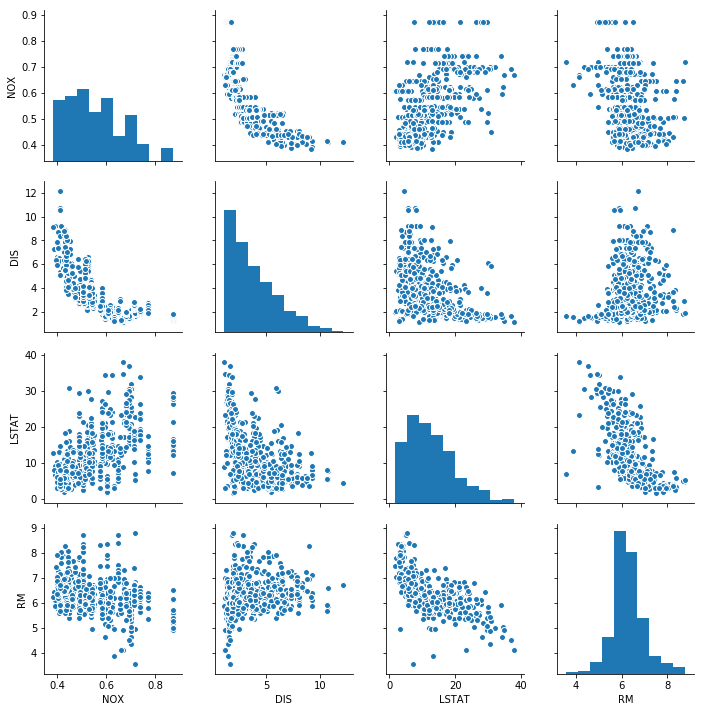

In [40]:
# Doing some pairplot to explore some features like NOX, DIS, LSTAT, and RM

sns.pairplot(df[['NOX', 'DIS', 'LSTAT', 'RM']])

In [41]:
# Adding a column to the DataFrame to display the house prices vs other features
combined_df = df.copy(deep=True)
combined_df['PRICE'] = boston_dataset.target

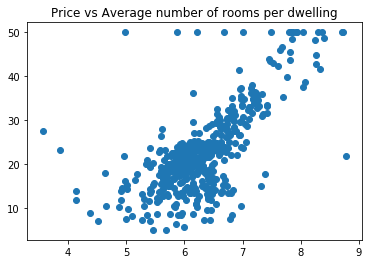

In [42]:
ax = plt.scatter(x="RM", y="PRICE", data=combined_df)
plt.title('Price vs Average number of rooms per dwelling')

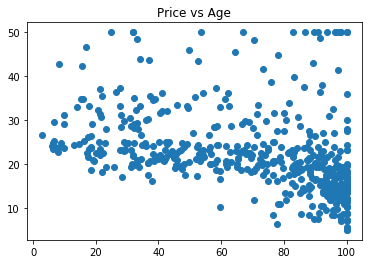

In [43]:
ax = plt.scatter(x="AGE", y="PRICE", data=combined_df)
plt.title('Price vs Age')

In [44]:
# Importing utility function to split up the dataset
from sklearn.model_selection import train_test_split

In [45]:
# Importing LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

score_array = []

for _ in range(10):
    train_X, test_X, train_Y, test_Y = train_test_split(df, boston_dataset.target)
    ols_clf = LinearRegression()
    ols_clf.fit(train_X, train_Y)
    score_array.append(ols_clf.score(test_X, test_Y))
    
score_average = np.array(score_array).mean()
print('LinearRegression Average Score: {}'.format(score_average))

LinearRegression Average Score: 0.726307438685


**A few things to note:**
1. Regularization -- "artificially discourages complex or extreme explanations of the world even if they fit the what has been observed better. The idea is that such explanations are unlikely to generalize well to the future; they may happen to explain a few data points from the past well, but this may just be because of accidents of the sample." [2]
2. Cross-validation -- "hold out part of the available dataset as a test set to avoid a case of overfitting, in which a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data" [3]
3. Bias-Variance trade-off -- balancing error from wrong assumptions in a learning algorithm (bias) and error from sensitivity to fluctuations in the training set [4]

A related Kaggle competition can be found at: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Classification

Classification: "The problem of identifying the which of a set of categories a new observation belongs" [5]

Target: Determine which "cultivar" the wine is (while “variety” refers to a natural phenomenon, a “cultivar” or “cultivated variety" is one that’s been selected for desirable characteristics and propagated by humans via things like hybrids, grafts or clones.[6])

In [54]:
data = load_wine()

In [55]:
print(data.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [56]:
# Loading the data into a pandas DataFrame object
df = pd.DataFrame(data.data, columns=data.feature_names)

# Adding a column to the DataFrame to display the house prices vs other features
combined_df = df.copy(deep=True)
combined_df['CLASS'] = data.target

# Looking at some rows about this dataset
combined_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,CLASS
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [57]:
combined_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,CLASS
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [58]:
# Importing tree for buildling decision trees
from sklearn import tree

# Import to build tree visualization
from sklearn.externals.six import StringIO

# Import to measure model
from sklearn.metrics import mean_squared_error

train_X, test_X, train_Y, test_Y = train_test_split(data.data, data.target)

In [59]:
clf_depth2 = tree.DecisionTreeClassifier(max_depth=2)
clf_depth2 = clf_depth2.fit(train_X, train_Y)
y_hat = clf_depth2.predict(test_X)
print('Mean Squared Error: '+str(mean_squared_error(test_Y, y_hat)))

Mean Squared Error: 0.288888888889


In [60]:
with open("decision_tree_depth2.dot", 'w') as f:
    f = tree.export_graphviz(clf_depth2, out_file=f)

Copy and paste the following into webgraphviz.com to visualize the tree of depth 2 we just made:

digraph Tree {
node [shape=box] ;
0 [label="X[9] <= 3.82\ngini = 0.66\nsamples = 133\nvalue = [40, 53, 40]"] ;
1 [label="X[12] <= 774.0\ngini = 0.117\nsamples = 48\nvalue = [3, 45, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]"] ;
1 -> 2 ;
3 [label="gini = 0.5\nsamples = 6\nvalue = [3, 3, 0]"] ;
1 -> 3 ;
4 [label="X[6] <= 1.58\ngini = 0.58\nsamples = 85\nvalue = [37, 8, 40]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]"] ;
4 -> 5 ;
6 [label="gini = 0.268\nsamples = 44\nvalue = [37, 7, 0]"] ;
4 -> 6 ;
}


In [61]:
clf_depthfull = tree.DecisionTreeClassifier()
clf_depthfull = clf_depthfull.fit(train_X, train_Y)
y_hat = clf_depthfull.predict(test_X)
print('Mean Squared Error: '+str(mean_squared_error(test_Y, y_hat)))

Mean Squared Error: 0.2


In [62]:
with open("decision_tree_depthfull.dot", 'w') as f:
    f = tree.export_graphviz(clf_depthfull, out_file=f)

Copy and paste the following into webgraphviz.com to visualize the tree (with no depth limit) we just made:

digraph Tree {
node [shape=box] ;
0 [label="X[9] <= 3.82\ngini = 0.66\nsamples = 133\nvalue = [40, 53, 40]"] ;
1 [label="X[12] <= 774.0\ngini = 0.117\nsamples = 48\nvalue = [3, 45, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]"] ;
1 -> 2 ;
3 [label="X[9] <= 3.365\ngini = 0.5\nsamples = 6\nvalue = [3, 3, 0]"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]"] ;
3 -> 5 ;
6 [label="X[6] <= 1.58\ngini = 0.58\nsamples = 85\nvalue = [37, 8, 40]"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
7 [label="X[10] <= 0.97\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]"] ;
7 -> 9 ;
10 [label="X[12] <= 724.5\ngini = 0.268\nsamples = 44\nvalue = [37, 7, 0]"] ;
6 -> 10 ;
11 [label="X[10] <= 0.83\ngini = 0.219\nsamples = 8\nvalue = [1, 7, 0]"] ;
10 -> 11 ;
12 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]"] ;
11 -> 12 ;
13 [label="gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]"] ;
11 -> 13 ;
14 [label="gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]"] ;
10 -> 14 ;
}




## Resources
1. https://www.coursera.org/learn/ml-regression#
2. https://www.quora.com/What-is-regularization-in-machine-learning
3. http://scikit-learn.org/stable/modules/cross_validation.html
4. https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff
5. https://en.wikipedia.org/wiki/Statistical_classification
6. http://www.winespectator.com/drvinny/show/id/52901